In [29]:
import sys
import numpy as np
import os

import mpld3
import matplotlib.pyplot as plt

In [43]:
# Constants
FILE_PATH = "../output/stats_beforeRingCheck.txt"
FILE_PATH2 = "../output/stats_afterRingCheck.txt"

In [44]:
class TagDetectionStatistics:
    PC_SIZE_IDX              = 0
    EDGE_CLOUD_SIZE_IDX      = 1
    TOTAL_CLUSTER_SIZE_IDX   = 2
    REMOVED_BY_AREA_IDX      = 3 
    REMOVED_BY_BOUNDARY_IDX  = 4
    REMOVED_BY_NO_EDGE_IDX   = 5
    REMOVED_BY_MIN_RET_IDX   = 6
    REMAINING_CLUSTERS_IDX   = 10
    
    class Data:
        def __init__(self):
            self.pc_size              = []
            self.edge_cloud_size      = []
            self.total_cluster_size   = []
            self.removed_by_area      = []
            self.removed_by_boundary  = []
            self.removed_by_no_edge   = []
            self.removed_by_min_ret   = []
            self.remaining_clusters   = []
            
    def __init__(self):
        self.pc_size              = []
        self.edge_cloud_size      = []
        self.total_cluster_size   = []
        self.removed_by_area      = []
        self.removed_by_boundary  = []
        self.removed_by_no_edge   = []
        self.removed_by_min_ret   = []
        self.remaining_clusters   = []

    def convertToNumpy(self):
        data = TagDetectionStatistics.Data()

        data.pc_size              = np.array(self.pc_size).astype(np.int)
        data.edge_cloud_size      = np.array(self.edge_cloud_size).astype(np.int)
        data.total_cluster_size   = np.array(self.total_cluster_size).astype(np.int)
        data.removed_by_area      = np.array(self.removed_by_area).astype(np.int)
        data.removed_by_boundary  = np.array(self.removed_by_boundary).astype(np.int)
        data.removed_by_no_edge   = np.array(self.removed_by_no_edge).astype(np.int)
        data.removed_by_min_ret   = np.array(self.removed_by_min_ret).astype(np.int)
        data.remaining_clusters   = np.array(self.remaining_clusters).astype(np.int)

        return data

In [45]:
def readStatisticsFromFile(filepath):

    stats = TagDetectionStatistics()

    with open(filepath) as fp:
        for line in fp:
            
            line_split = line.split(',')
            
            stats.pc_size.append(
                line_split[TagDetectionStatistics.PC_SIZE_IDX])
            stats.edge_cloud_size.append(
                line_split[TagDetectionStatistics.EDGE_CLOUD_SIZE_IDX])
            stats.total_cluster_size.append(
                line_split[TagDetectionStatistics.TOTAL_CLUSTER_SIZE_IDX])
            stats.removed_by_area.append(
                line_split[TagDetectionStatistics.REMOVED_BY_AREA_IDX])
            stats.removed_by_boundary.append(
                line_split[TagDetectionStatistics.REMOVED_BY_BOUNDARY_IDX])
            stats.removed_by_no_edge.append(
                line_split[TagDetectionStatistics.REMOVED_BY_NO_EDGE_IDX])
            stats.removed_by_min_ret.append(
                line_split[TagDetectionStatistics.REMOVED_BY_MIN_RET_IDX])
            stats.remaining_clusters.append(
                line_split[TagDetectionStatistics.REMAINING_CLUSTERS_IDX])
                     
    return stats.convertToNumpy()

In [46]:
data = readStatisticsFromFile(FILE_PATH)
dataA = readStatisticsFromFile(FILE_PATH2) 

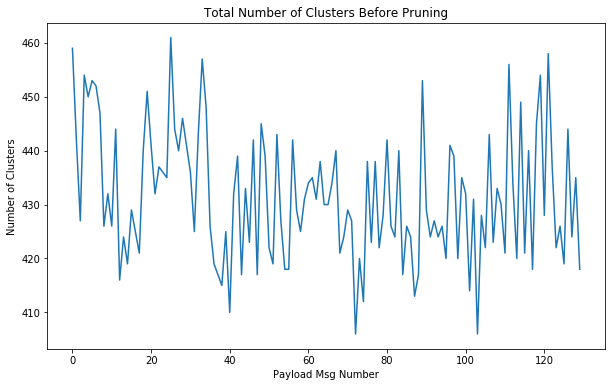

In [38]:
mpld3.enable_notebook()

fig = plt.gcf()
fig.set_size_inches(10,6)

plt.plot(data.total_cluster_size)
plt.title("Total Number of Clusters Before Pruning")
plt.xlabel("Payload Msg Number")
plt.ylabel("Number of Clusters");

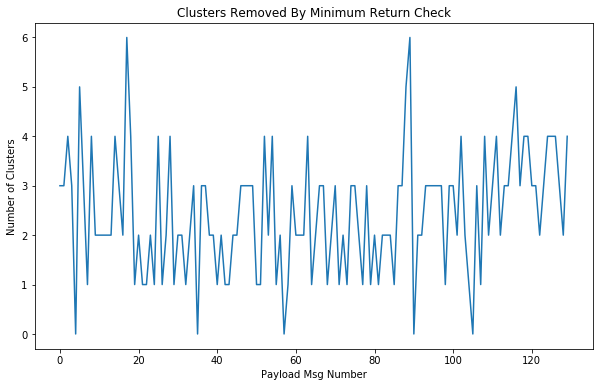

In [39]:
mpld3.enable_notebook()

fig = plt.gcf()
fig.set_size_inches(10,6)

plt.plot(data.removed_by_min_ret)
plt.title("Clusters Removed By Minimum Return Check")
plt.xlabel("Payload Msg Number")
plt.ylabel("Number of Clusters");

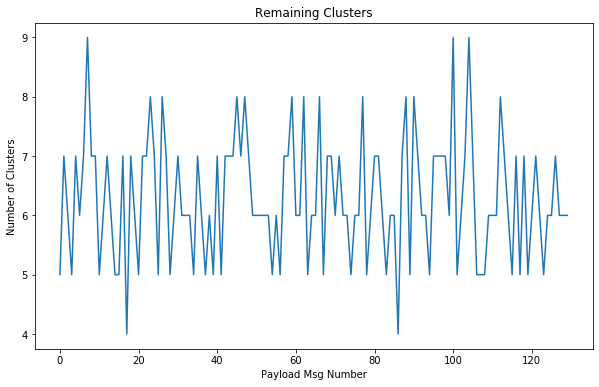

In [40]:
mpld3.enable_notebook()

fig = plt.gcf()
fig.set_size_inches(10,6)

plt.plot(data.remaining_clusters)
plt.title("Remaining Clusters")
plt.xlabel("Payload Msg Number")
plt.ylabel("Number of Clusters");

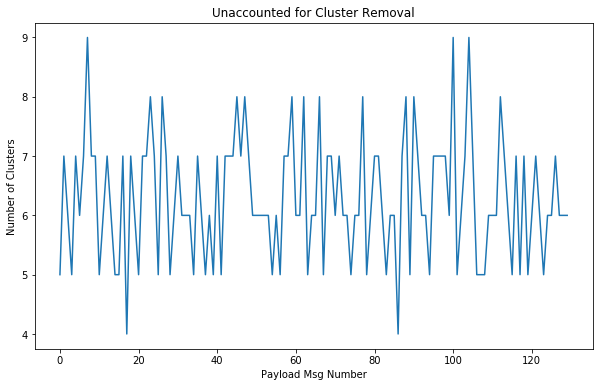

In [41]:
mpld3.enable_notebook()

fig = plt.gcf()
fig.set_size_inches(10,6)

unaccounted_clusters = data.total_cluster_size - \
    data.removed_by_area - \
    data.removed_by_boundary - \
    data.removed_by_no_edge - \
    data.removed_by_min_ret

plt.plot(unaccounted_clusters)
plt.title("Unaccounted for Cluster Removal")
plt.xlabel("Payload Msg Number")
plt.ylabel("Number of Clusters");

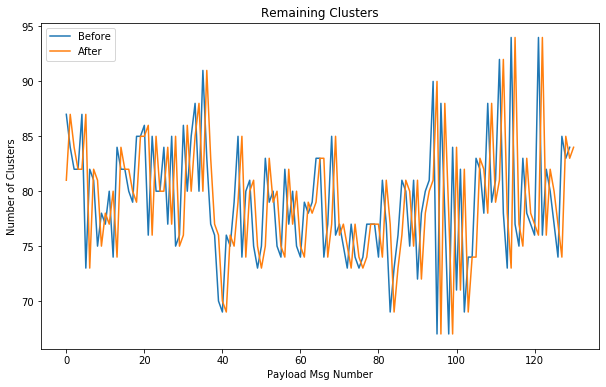

In [47]:
mpld3.enable_notebook()

fig = plt.gcf()
fig.set_size_inches(10,6)

plt.plot(data.removed_by_boundary, label="Before")
plt.plot(dataA.removed_by_boundary, label="After")
plt.legend()
plt.title("Remaining Clusters")
plt.xlabel("Payload Msg Number")
plt.ylabel("Number of Clusters");